### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
ratings = pd.read_csv('ratings.csv')
movie = pd.read_csv('movie.csv')
user = pd.read_csv('user.csv')

#ratings.head()
#movie.head()
#user.head()

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Information for ratings table

In [3]:
ratings.info()
print('Shape of ratings table:', ratings.shape)
ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
Shape of ratings table: (100000, 4)


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


**Ratings Table Analysis:**
There are 4 columns in the data and 100,000 rows. All columns are of type int. There are NO missing values in the data as not-null count is zero. However we still have to validate whether all the values are valid. For example, whether all ratings are numerical or not. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Information for Movie table

In [4]:
movie.info()
print('Shape of movie table:', movie.shape)
movie.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Movie Table Analysis:**
There are 22 columns in the data and 1,681 rows. 20 columns are of type int and two are of type obj (Movie title and release date). There are NO missing values in the data as not-null count is zero.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Information for User table

In [5]:
user.info()
print('Shape of user table:', user.shape)
user.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
Shape of user table: (943, 5)


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


**User Table Analysis:**
There are 4 columns in the data and 943 rows. 3 columns are of type obj - non-numerical or categorical, which would need to be encoded for further analysis. There are NO missing values in the data as not-null count is zero.

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [6]:
# Get the sum of movie item data - use sum() function. ignore first three columnsmovie title and release date fields. 
print(movie.sum())
#help(np.sum)


movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [7]:
# help(pd.drop) #"module - Why is help not working? What am I doing wrong?
#mask1 = movie.loc[movie['unknown']==1] - same as below
mask = movie[movie['unknown']==1].index
#print(mask)
movie.drop(mask, inplace=True)

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [8]:
#Find the movies that have more than one genre
# Add a column to get the sum of count of genres. 
movie['No_of_Genre'] = 0
movie['No_of_Genre'] = movie.values[:, 4:].sum(axis =1)


#Display movie name, number of genres for the movie in dataframe - all movies
print(movie[['movie title', 'No_of_Genre']])


#and also print(total number of movies which have more than one genres)
print('Total number of movies which have more than one genres:', movie[movie['No_of_Genre']> 1].shape[0])

                              movie title No_of_Genre
0                              Toy Story            3
1                              GoldenEye            3
2                             Four Rooms            1
3                             Get Shorty            3
4                                Copycat            3
...                                   ...         ...
1676                          Mat' i syn            1
1677                           B. Monkey            2
1678                       Sliding Doors            2
1679                        You So Crazy            1
1680  Scream of Stone (Schrei aus Stein)            1

[1680 rows x 2 columns]
Total number of movies which have more than one genres: 849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [9]:
# a = 'My*cat*is*brown'
# print(a.split('*')[3])
# #similarly, the release year needs to be taken out from release date
# #also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat
# print(a[10:])
# print(a[-5:])j 

# yearsplit = movie['release date'].str.split('-', expand = True)
# movie['year'] = yearsplit[2]
# movie

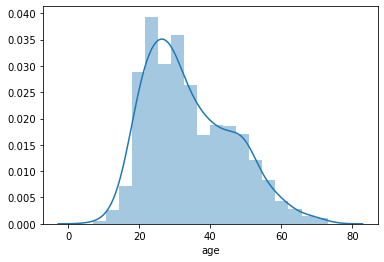

In [10]:
#Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'
#HINT: Use distplot for age. Use lineplot or countplot for release year.

# 1 - Age
# Use distplot for age
sns.distplot(user['age'], norm_hist=False)
plt.show()

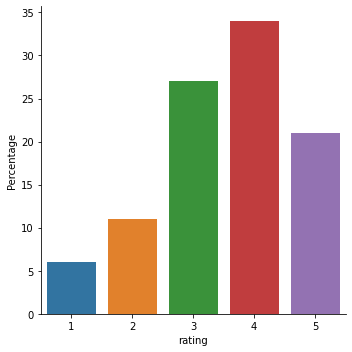

In [11]:
#HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation

# 2 - Rating
# creating a new dataframe with two columns - 
rating_d = pd.DataFrame(round((ratings['rating'].value_counts(normalize=True))*100,0))
rating_d.reset_index(inplace=True)
rating_d.rename({'index': 'rating', 'rating': 'Percentage'}, axis=1, inplace=True)
sns.catplot(x='rating', y='Percentage', data = rating_d, kind = "bar" )
plt.show()

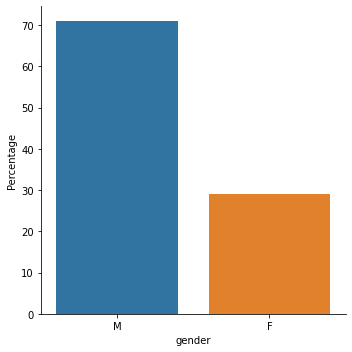

In [12]:
# 3 - gender (user.gender)
# creating a new dataframe with two columns - 
gender_d = pd.DataFrame(round((user['gender'].value_counts(normalize=True))*100,0))
gender_d.reset_index(inplace=True)
gender_d.rename({'index': 'gender', 'gender': 'Percentage'}, axis=1, inplace=True)
sns.catplot(x='gender', y='Percentage', data = gender_d, kind = "bar" )
plt.show()

<Figure size 1080x360 with 0 Axes>

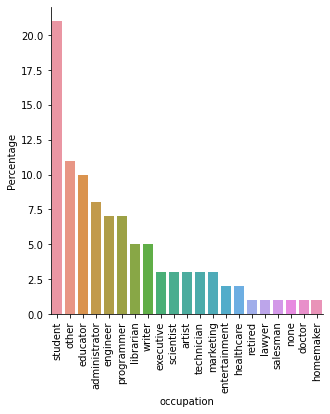

In [13]:
# 4 - occupation (user.occupation)
# creating a new dataframe with two columns - 
occupation_d = pd.DataFrame(round((user['occupation'].value_counts(normalize=True))*100,0))
occupation_d.reset_index(inplace=True)
occupation_d.rename({'index': 'occupation', 'occupation': 'Percentage'}, axis=1, inplace=True)
plt.figure(figsize=(15,5))
chart = sns.catplot(x='occupation', y='Percentage', data = occupation_d, kind = "bar" )
chart.set_xticklabels(rotation=90)
plt.show()

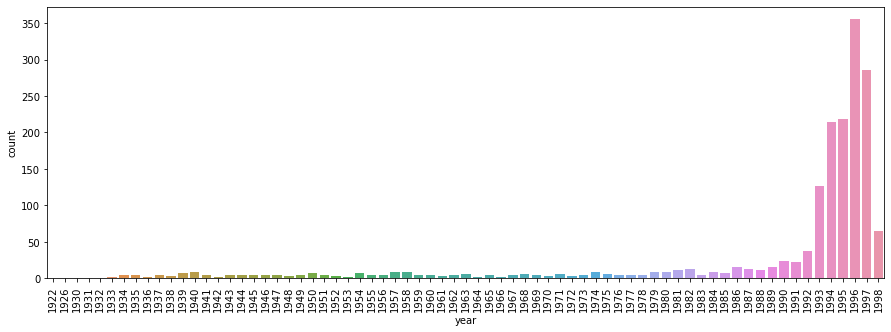

In [14]:
# 5 - year (movie.year)
# creating a new dataframe with two columns -
yearsplit = movie['release date'].str.split('-', expand = True)
movie['year'] = yearsplit[2]
plt.figure(figsize=(15,5))
chart = sns.countplot(x='year', data=movie)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [15]:
# Hint 1: You need to reach to a data frame where the release year is the index and the genre
# is the column names (one cell shows the number of release in a year in one genre) or vice 
# versa. (Drop unnecessary column if there are any)
groupedyear = movie.drop('movie id', axis=1).groupby('year').sum()
# groupedyear

In [16]:
# Hint 2: Find the total number of movies release in a year(use sum(axis=1) store that value 
# in a new column as 'total'). Now divide the value of each genre in that year by total to 
# get percentage number of release in a particular year. (df.div(df['total'], axis= 0) * 100)

groupedyear_n = groupedyear.copy()
groupedyear_n.drop('unknown', axis=1, inplace=True)
groupedyear_n['total'] = groupedyear.sum(axis=1)

In [17]:
groupedyear_p = groupedyear_n.div(groupedyear_n['total'], axis= 0) * 100

In [18]:
# Once that is achieved, you can either use univariate plots or can use the heatmap to 
# visualise all the changes over the years in one go.
# Hint 3: Use groupby on the relevant column and use sum() on the same to find out 
# the number of releases in a year/genre.
groupedyear_p.drop('total', axis=1,inplace=True)

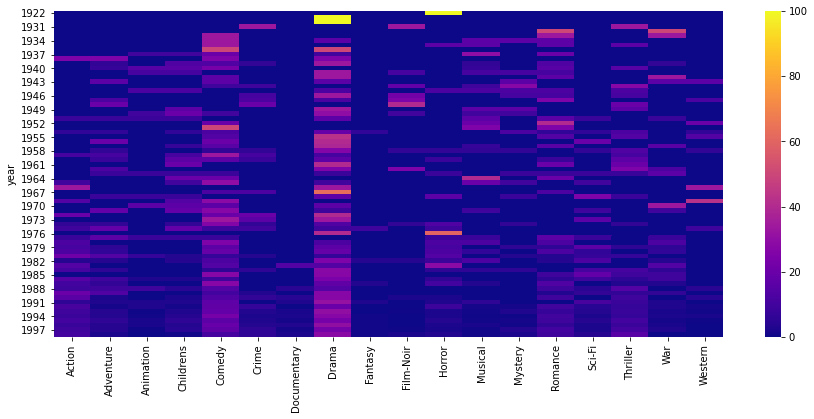

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(groupedyear_p, cmap="plasma")
plt.show()

**Observations from boxplot**

We could see that certain genres such as comedy, drama, and romance have been popular throughout the years, to an extent thriller as well. 

Documentary seems to have started out as a new genre around mid 1980's. 

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [20]:
# 1. Find the count of ratings and average ratings for every movie.
ratings_by_movie = ratings.drop('user id',axis=1).groupby('movie id').mean()
ratings_by_movie.drop('timestamp', axis=1, inplace=True)
ratings_by_movie.rename({'rating': 'avg rating'}, axis=1, inplace=True)

count_of_movie = ratings.groupby('movie id').count()
count_of_movie.drop('rating', axis=1, inplace=True)
count_of_movie.drop('timestamp', axis=1, inplace=True)
count_of_movie.rename({'user id': 'count'}, axis=1, inplace=True)

df = ratings_by_movie.join(count_of_movie,how='left')

# 2. Slice the movies which have ratings more than 100.
gt100 = df['count']>100
df1 = df[gt100]
# 3. Sort values according to average rating such that movie with highest rating is on top.
# 4. Select top 25 movies.
df2 = df1.sort_values(by=['avg rating'], ascending=False).head(25)
df2.reset_index(inplace=True)
# 5. You will have to use the .merge() function to get the movie titles.
movie_sub = movie[['movie id', 'movie title']]
# df2.info()
# pd.merge?
df2.merge(movie_sub, how = 'left', left_on='movie id', right_on='movie id')

,movie id,avg rating,count,movie title
0,408,4.491071,112,"Close Shave, A"
1,318,4.466443,298,Schindler's List
2,169,4.466102,118,"Wrong Trousers, The"
3,483,4.456790,243,Casablanca
4,64,4.445230,283,"Shawshank Redemption, The"
5,603,4.387560,209,Rear Window
6,12,4.385768,267,"Usual Suspects, The"
7,50,4.358491,583,Star Wars
8,178,4.344000,125,12 Angry Men
9,134,4.292929,198,Citizen Kane


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [21]:
# merge ratings and user
ratings_user = pd.merge(ratings, user[['user id', 'gender']], how = 'left', left_on='user id', right_on='user id')

#merge with movie data
All_data = pd.merge(ratings_user, movie, how ='left', left_on='movie id', right_on='movie id')

# drop uncecessary columns
All_data.drop(['release date','timestamp','unknown'], axis=1,inplace=True)


In [22]:
#calculting the total genres per each review
All_data['total'] = 0
All_data['total'] = All_data.loc[:,'Action':].sum(axis=1)

#group data by gender
All_data_grouped = All_data.groupby('gender').agg({'rating':'count', 'Drama': 'sum', 'Sci-Fi':'sum', 'Romance':'sum', 'total': 'sum' })
All_data_grouped.rename({'rating': 'count'}, axis=1, inplace=True)
All_data_grouped

,count,Drama,Sci-Fi,Romance,total
gender,,,,,
F,25740,11008.0,2629.0,5858.0,53701.0
M,74260,28887.0,10101.0,13603.0,158884.0


In [23]:
All_data_1 = All_data_grouped.drop('count', axis = 1)
All_data_Perc = All_data_1.div(All_data_1['total'], axis= 0) * 100
All_data_Perc

,Drama,Sci-Fi,Romance,total
gender,,,,
F,20.498687,4.895626,10.908549,100.0
M,18.181189,6.357468,8.561592,100.0


** Observations from the data**
1. Men watch more drama than women - 
If we compare absolute numbers:
There are a total of ~11,000 ratings from women and ~28,000 ratings from men for Drama. Based on the absolute numbers, men seem to have watched a lot of 'Drama' than women. 

    If we compare the numbers as a percentage, making assumptions as given in the question, 20% of the women seem to watch drama as compared to 18% of men. 

2. Women watch more Sci-Fi than men - 
This is not correct based in this data. Both as an absolute number and as a percentage, women watch less sci-fi than men.

3. Men watch more Romance than women - 
This is also not correct. Again, both as an absolute number and percentage, women tend to watch more romance than men. 